In [2]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt

import numpy as np

from scipy.interpolate import UnivariateSpline
from numpy import linspace, array, arange

# for colour cycling in graphs
from itertools import cycle
cycol = cycle('cmy').next

# set defaults for charts
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['font.size'] = 14.0

In [5]:
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms=5)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)


In [6]:
spl.__call__(0)

array(0.9272292989618743)

In [7]:
x = np.array([0.555,
0.758,
0.862,
1.135,
1.396])

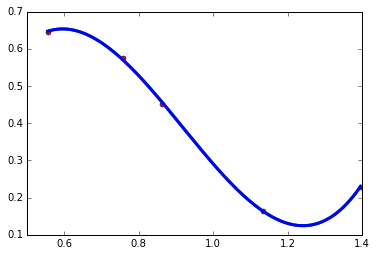

In [8]:
y = np.exp(-x**2) + 0.1 * np.random.randn(5)
plt.plot(x, y, 'ro', ms=5)
spl = UnivariateSpline(x, y)
xs = np.linspace(0.555, 1.396, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)

In [9]:
spl.__call__(1)

array(0.2906558964491536)

array(1.0083026315789476)

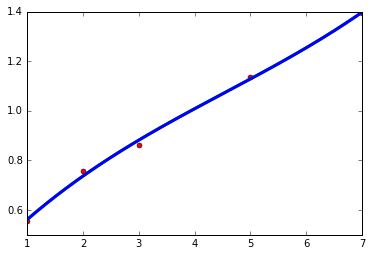

In [14]:
x = np.array([1,2,3,5,7])
y = np.array([0.555, 0.758, 0.862, 1.135, 1.396])


plt.plot(x, y, 'ro', ms=5)
spl = UnivariateSpline(x, y)
xs = np.linspace(1, 7, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)

spl.__call__(4)

array(1.010671052631579)

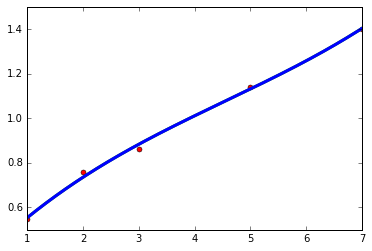

In [13]:
x = np.array([1,2,3,5,7])
y = np.array([0.547,0.758,0.862,1.138,1.401])


plt.plot(x, y, 'ro', ms=5)
spl = UnivariateSpline(x, y)
xs = np.linspace(1, 7, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)

spl.__call__(4)

1.03775657895


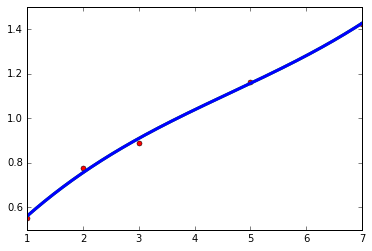

In [18]:
def getInterpolatedY4(ydata=np.array):
    x = np.array([1,2,3,5,7])
    y = np.array(ydata)
    plt.plot(x, y, 'ro', ms=5)
    spl = UnivariateSpline(x, y)
    xs = np.linspace(1, 7, 1000)
    plt.plot(xs, spl(xs), 'g', lw=3)

    spl.set_smoothing_factor(0.5)
    plt.plot(xs, spl(xs), 'b', lw=3)

    return spl.__call__(4)

low = [0.555,0.778,0.889,1.163,1.424]
print getInterpolatedY4(low)

In [22]:
chg = [0.008,
-0.005,
-0.00,
-0.003,
-0.005]
print getInterpolatedY4(chg)

-0.00315789473684


-0.331774227351


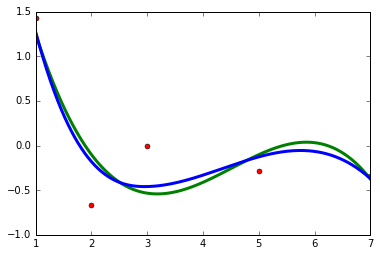

In [21]:
perChg = [1.43,
-0.67,
-0,
-0.28,
-0.34,]
print getInterpolatedY4(perChg)


1.01067105263


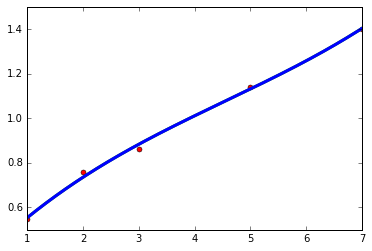

In [23]:
prev = [0.547, 0.758, 0.862, 1.138, 1.401]
print getInterpolatedY4(prev)


0.988355263158


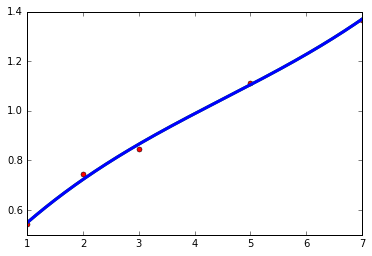

In [24]:
low = [
    0.542,
0.746,
0.844,
1.112,
1.368,
]

print getInterpolatedY4(low
                       )

1.00830263158


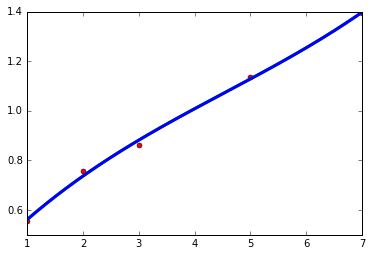

In [25]:
low = [0.555,
0.758,
0.862,
1.135,
1.396]
print getInterpolatedY4(low)

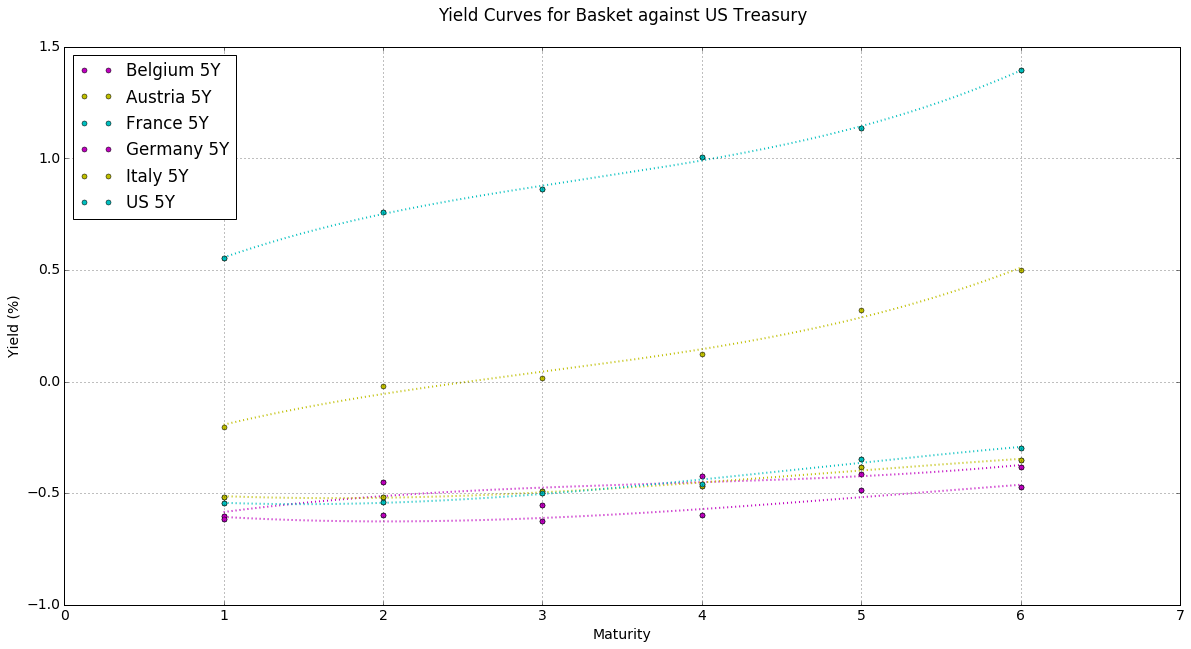

In [19]:
# plot yield curves

usYc = [0.555,0.758,0.862,1.008302632,1.135,1.396]
autYc = [-0.515, -0.518,-0.49,-0.469,-0.384,-0.35]
beYc = [-0.602,-0.45,-0.551,-0.425,-0.412,-0.381]
frYc = [-0.545,-0.54,-0.497,-0.458,-0.347,-0.297]
deYc = [-0.616,-0.599,-0.625,-0.598,-0.484,-0.473]
itaYc = [-0.205,-0.019,0.018,0.125,0.321,0.499]
x = np.arange(1,7)
plt.plot(x, usYc, 'ro', c=cycol(), ms=5)
plt.plot(x, autYc, 'ro',c=cycol(),  ms=5)
plt.plot(x, beYc, 'ro',c=cycol(), ms=5)
plt.plot(x, frYc, 'ro',c=cycol(), ms=5)
plt.plot(x, deYc, 'ro',c=cycol(), ms=5)
plt.grid()
plt.title('Yield Curves for Basket against US Treasury\n')

# interpolate for smooth curve
legs = []
def plotInterpolatedCurve(xdata=array, ydata=array, label=str):
    lincol = cycol()
    plt.plot(xdata, ydata, 'ro',c=lincol, ms=5, label=label)
    spl = UnivariateSpline(xdata, ydata)
    xs = linspace(min(xdata), len(xdata), 1000)
    spl.set_smoothing_factor(0.5)
    legHandler, = plt.plot(xs, spl(xs),':k', c=lincol, lw=2)
    legs.append(legHandler)

plt.xlabel('Maturity')
plt.ylabel('Yield (%)')
plt.xlim(0,7)
plotInterpolatedCurve(x,beYc, 'Belgium 5Y')
plotInterpolatedCurve(x,autYc, 'Austria 5Y')
plotInterpolatedCurve(x,frYc, 'France 5Y')
plotInterpolatedCurve(x,deYc, 'Germany 5Y')
plotInterpolatedCurve(x,itaYc, 'Italy 5Y')
plotInterpolatedCurve(x,usYc, 'US 5Y')
plt.legend(loc='upper left')
# plt.legend(handles=[legs])


plt.show()

